In [1]:
!pip install ipykernel
!pip install beautifulsoup4
!pip install datasets
!pip install transformers
!pip install git-lfs
!pip install torch
!pip install accelerate
!pip install evaluate
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.7 MB/s eta 0:00:00
ERROR: Could not find a version that s

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
from bs4 import BeautifulSoup
import re
from google.colab import drive


In [3]:
drive.mount('/content/drive')
filepath_questions = '/content/drive/My Drive/dataspeak/archive/Questions.csv'
filepath_answers = '/content/drive/My Drive/dataspeak/archive/Answers.csv'
filepath_tags = '/content/drive/My Drive/dataspeak/archive/Tags.csv'


Mounted at /content/drive


In [4]:
df_questions = pd.read_csv(filepath_questions, encoding='iso-8859-1')
df_answers = pd.read_csv(filepath_answers, encoding='iso-8859-1')
df_tags = pd.read_csv(filepath_tags)

In [5]:
#df_questions = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/dataspeak/archive/Questions.csv', encoding='iso-8859-1')
#df_answers = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/dataspeak/archive/Answers.csv', encoding='iso-8859-1')
#df_tags = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/dataspeak/archive/Tags.csv')


In [6]:
display(df_questions.sample(5))
df_questions.info()


,Id,OwnerUserId,CreationDate,Score,Title,Body
589130,39438941,3422137.0,2016-09-11T17:46:21Z,0,python SQL query insert shows empty rows,<p>I am trying to do a insert query in the SQL...
343614,27738632,4411703.0,2015-01-02T07:05:14Z,1,Equal strings auto updating (List object refer...,<p>I recently did an exam for university and I...
516715,36320514,802731.0,2016-03-30T22:00:28Z,1,How to restrict base class method to be run on...,<pre><code>class car(object):\n def read_sp...
605444,40074032,4863796.0,2016-10-16T18:39:34Z,2,How to un-elevate permissions in windows with ...,<p>I'm trying to run commands as a particular ...
524877,36680358,5166066.0,2016-04-17T18:16:57Z,0,Why show this Error 'function' object has no a...,<p>I want to update my user profile data.But w...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607282 entries, 0 to 607281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            607282 non-null  int64  
 1   OwnerUserId   601070 non-null  float64
 2   CreationDate  607282 non-null  object 
 3   Score         607282 non-null  int64  
 4   Title         607282 non-null  object 
 5   Body          607282 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 27.8+ MB


In [7]:
display(df_answers.sample(5))
df_answers.info()


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
562266,25417701,3898460.0,2014-08-21T03:13:55Z,25417625,1,"<p>Try</p>\n\n<pre><code>df.iloc[:, 0:3].div(d..."
865841,36224399,6110823.0,2016-03-25T16:59:33Z,36224325,0,<p>try this approach:</p>\n\n<p>foreach innerl...
352327,16474271,166949.0,2013-05-10T02:33:05Z,16474229,5,"<p>I haven't tried running your code, but you ..."
764541,32909383,953482.0,2015-10-02T14:24:02Z,32909276,1,<p>You could change the file name each time:</...
798780,34037311,1316971.0,2015-12-02T07:44:24Z,6024100,0,<p>I know this response comes from significant...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987122 entries, 0 to 987121
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            987122 non-null  int64  
 1   OwnerUserId   981755 non-null  float64
 2   CreationDate  987122 non-null  object 
 3   ParentId      987122 non-null  int64  
 4   Score         987122 non-null  int64  
 5   Body          987122 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.2+ MB


In [8]:
display(df_tags.sample(5))
df_tags.info()

,Id,Tag
1488663,34820135,string
1779944,38810575,pandas
1703759,37816973,permissions
37106,1770986,py2exe
1255484,31224075,django


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885078 entries, 0 to 1885077
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 28.8+ MB


In [9]:
df_questions = df_questions.rename(columns={'Id': 'id', 'OwnerUserId': 'owner_user_id', 'CreationDate': 'creation_date', 'Score': 'score', 'Title': 'title', 'Body': 'body'})

In [10]:
df_answers = df_answers.rename(columns={'Id': 'id', 'OwnerUserId': 'owner_user_id', 'CreationDate': 'creation_date', 'ParentId': 'parent_id', 'Score': 'score', 'Body': 'body'})

In [11]:
df_tags = df_tags.rename(columns={'Id': 'id', 'Tag': 'tag'})

In [12]:
df_questions['body'] = df_questions['body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [13]:
df_answers['body'] = df_answers['body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [14]:
display(df_questions.sample(5))

,id,owner_user_id,creation_date,score,title,body
178676,16969812,1008859.0,2013-06-06T18:45:44Z,0,Python: VMware Object data,How does one get all the property values from ...
379624,29705871,4059825.0,2015-04-17T17:32:46Z,1,Smallest algebraic eigenvalues (including nega...,I'm trying to get the smallest algebraic eigen...
214679,19599579,257640.0,2013-10-25T21:18:29Z,3,Flattening an array only one layer?,Is there any built-in numpy function that woul...
338989,27462827,391161.0,2014-12-13T19:36:35Z,3,Is there a more Pythonic way to conditionally ...,Suppose I have the following list.\nmyList = [...
405276,31068422,499156.0,2015-06-26T08:25:44Z,2,Flask WTF â Forms always redirect to root,I have created a simple Flask WTF form\nclass ...


In [15]:
display(df_answers.sample(5))

,id,owner_user_id,creation_date,parent_id,score,body
249559,11575755,221955.0,2012-07-20T08:36:16Z,11575404,1,"If you don't want to install node.js, you coul..."
379158,17668222,2286078.0,2013-07-16T04:48:02Z,17668098,2,Third-party libraries on your local computer a...
576296,26022321,2419183.0,2014-09-24T16:47:40Z,26022250,2,The issue is that the python input() function ...
756499,32620779,2411802.0,2015-09-17T00:24:49Z,32577149,0,Your code works on a small sample of five file...
649907,28863993,565906.0,2015-03-04T20:13:35Z,28863026,2,Don't know if you wanted general feedback but ...


In [16]:
display(df_tags.sample(5))

,id,tag
98304,3776533,datatable
1024582,27208096,python-2.7
54731,2358936,subprocess
230219,8124780,xml-parsing
676448,20112660,sympy


In [17]:
def duplication(df, column1, column2, column3, column4, column5):

    print(df.duplicated().sum())

    num_columns = df.shape[1]

    if num_columns > 2:
        print(df.duplicated(subset=[column1, column2]).sum())
        print(df.duplicated(subset=[column1, column2, column3]).sum())
        print(df.duplicated(subset=[column1, column2, column3, column4]).sum())
        print(df.duplicated(subset=[column1, column2, column3, column4, column5]).sum())
    else:
        print(df.duplicated(subset=[column1, column2]).sum())
    return

In [18]:
duplication(df_questions, 'id', 'owner_user_id', 'creation_date', 'score', 'title')

0
0
0
0
0


In [19]:
duplication(df_answers, 'id', 'owner_user_id', 'creation_date', 'parent_id', 'score')

0
0
0
0
0


In [20]:
print(df_tags.duplicated().sum())

df_tags.drop_duplicates(inplace=True)
print(df_tags.duplicated().sum())


2
0


In [21]:
print(df_tags['id'].isna().sum())
print(df_tags['tag'].isna().sum())
print(df_tags['tag'].value_counts())
df_tags['tag'] = df_tags['tag'].fillna('no-tag')
print(df_tags['tag'].isna().sum())


0
441
python           607283
django            62818
python-2.7        34616
pandas            26854
python-3.x        26814
                  ...  
natural-join          1
quilt                 1
event-hooking         1
wsgidav               1
xml-libxml            1
Name: tag, Length: 16895, dtype: int64
0


In [22]:
df_questions['owner_user_id'] = df_questions['owner_user_id'].fillna(0)
df_questions['owner_user_id'] = df_questions['owner_user_id'].astype(int)
df_questions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607282 entries, 0 to 607281
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             607282 non-null  int64 
 1   owner_user_id  607282 non-null  int64 
 2   creation_date  607282 non-null  object
 3   score          607282 non-null  int64 
 4   title          607282 non-null  object
 5   body           607282 non-null  object
dtypes: int64(3), object(3)
memory usage: 27.8+ MB


In [23]:
df_answers['owner_user_id'] = df_answers['owner_user_id'].fillna(0)
df_answers['owner_user_id'] = df_answers['owner_user_id'].astype(int)
df_answers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987122 entries, 0 to 987121
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             987122 non-null  int64 
 1   owner_user_id  987122 non-null  int64 
 2   creation_date  987122 non-null  object
 3   parent_id      987122 non-null  int64 
 4   score          987122 non-null  int64 
 5   body           987122 non-null  object
dtypes: int64(4), object(2)
memory usage: 45.2+ MB


In [24]:
df_questions['creation_date'] = pd.to_datetime(df_questions['creation_date'])
df_answers['creation_date'] = pd.to_datetime(df_answers['creation_date'])

In [25]:
df_question_answer = df_questions.merge(df_answers,
                             left_on='id', right_on='parent_id',
                             suffixes=['_question', '_answer'])

display(df_question_answer)

#df_question_answer = df_question_answer.drop('user_id', axis='columns')

,id_question,owner_user_id_question,creation_date_question,score_question,title,body_question,id_answer,owner_user_id_answer,creation_date_answer,parent_id,score_answer,body_answer
0,469,147,2008-08-02 15:11:16+00:00,21,How can I find the full path to a font from it...,I am using the Photoshop's javascript API to f...,497,50,2008-08-02 16:56:53+00:00,469,4,open up a terminal (Applications->Utilities->T...
1,469,147,2008-08-02 15:11:16+00:00,21,How can I find the full path to a font from it...,I am using the Photoshop's javascript API to f...,518,153,2008-08-02 17:42:28+00:00,469,2,I haven't been able to find anything that does...
2,469,147,2008-08-02 15:11:16+00:00,21,How can I find the full path to a font from it...,I am using the Photoshop's javascript API to f...,3040,457,2008-08-06 03:01:23+00:00,469,12,Unfortunately the only API that isn't deprecat...
3,469,147,2008-08-02 15:11:16+00:00,21,How can I find the full path to a font from it...,I am using the Photoshop's javascript API to f...,195170,745,2008-10-12 07:02:40+00:00,469,1,There must be a method in Cocoa to get a list ...
4,502,147,2008-08-02 17:01:58+00:00,27,Get a preview JPEG of a PDF on Windows?,I have a cross-platform (Python) application w...,536,161,2008-08-02 18:49:07+00:00,502,9,You can use ImageMagick's convert utility for ...
...,...,...,...,...,...,...,...,...,...,...,...,...
987117,40142948,4307777,2016-10-19 23:09:22+00:00,-2,How do you make it so that a function returns ...,Basically I have a tuple which has 5 tuples in...,40143096,6043170,2016-10-19 23:26:15+00:00,40142948,0,Hereâs the quick and dirty way:\ndef formatt...
987118,40143133,6273496,2016-10-19 23:29:37+00:00,1,error handling with BeautifulSoup when scraped...,I'm totally noob to python so please forgive m...,40143231,771848,2016-10-19 23:40:22+00:00,40143133,1,You may check the value of name_box variable -...
987119,40143166,7044992,2016-10-19 23:33:31+00:00,1,finding cubed root using delta and epsilon in ...,I am trying to write a program that finds cube...,40143315,3125566,2016-10-19 23:49:43+00:00,40143166,2,"First thing, you should use if/elif instead of..."
987120,40143190,333403,2016-10-19 23:36:01+00:00,1,How to execute multiline python code from a ba...,I need to extend a shell script (bash). As I a...,40143212,1491895,2016-10-19 23:38:17+00:00,40143190,5,Use a here-doc:\nresult=$(python <<EOF\nimport...


In [26]:
df_question_answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987122 entries, 0 to 987121
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   id_question             987122 non-null  int64              
 1   owner_user_id_question  987122 non-null  int64              
 2   creation_date_question  987122 non-null  datetime64[ns, UTC]
 3   score_question          987122 non-null  int64              
 4   title                   987122 non-null  object             
 5   body_question           987122 non-null  object             
 6   id_answer               987122 non-null  int64              
 7   owner_user_id_answer    987122 non-null  int64              
 8   creation_date_answer    987122 non-null  datetime64[ns, UTC]
 9   parent_id               987122 non-null  int64              
 10  score_answer            987122 non-null  int64              
 11  body_answer             98

In [27]:
score_corr = df_question_answer['score_question'].corr(df_question_answer['score_answer'])
print(score_corr)

0.3170187552596402


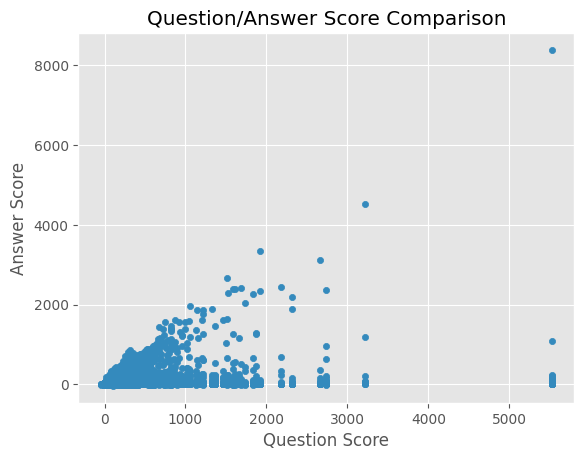

In [28]:
df_question_answer.plot(kind='scatter',
                        x='score_question',
                        y='score_answer',
                        xlabel='Question Score',
                        ylabel='Answer Score',
                        title='Question/Answer Score Comparison')

plt.show()

0.14497567409726064


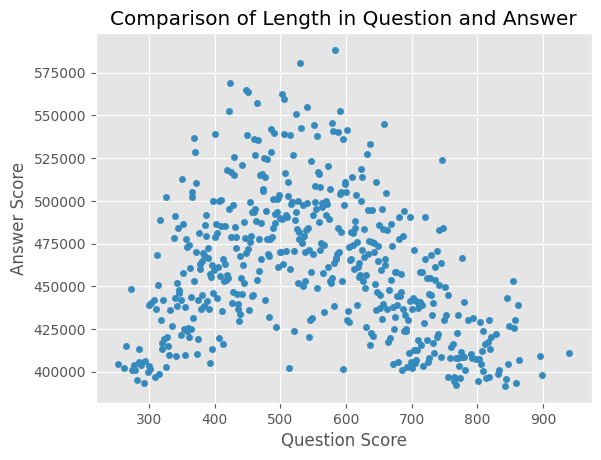

In [29]:
df_question_answer['body_question_length'] = df_question_answer['body_question'].str.len()
df_question_answer['body_answer_length'] = df_question_answer['body_answer'].str.len()

length_corr = df_question_answer['body_question_length'].corr(df_question_answer['body_answer_length'])
print(length_corr)

question_answer_length = df_question_answer.groupby('body_question_length')['body_answer_length'].sum().sort_values(ascending=False).head(500)

parent_answer_id = question_answer_length.reset_index().rename(columns={0: 'body_question_length', 'body_answer_length': 'body_answer_length'})


parent_answer_id.plot(kind='scatter',
                        x='body_question_length',
                        y='body_answer_length',
                        xlabel='Question Score',
                        ylabel='Answer Score',
                        title='Comparison of Length in Question and Answer')

plt.show()

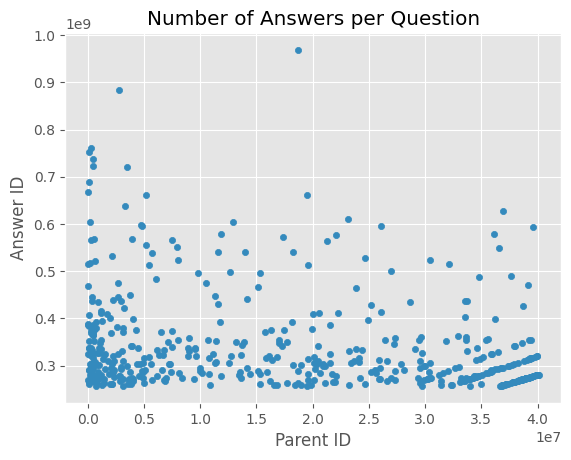

In [30]:
parent_answer_id = df_question_answer.groupby('parent_id')['id_answer'].sum().sort_values(ascending=False).head(500)

parent_answer_id = parent_answer_id.reset_index().rename(columns={0: 'parent_id', 'id_answer': 'id_answer'})

parent_answer_id.plot(kind='scatter',
                        x='parent_id',
                        y='id_answer',
                        xlabel='Parent ID',
                        ylabel='Answer ID',
                        title='Number of Answers per Question')

plt.show()

In [31]:
df_question_answer = df_question_answer.drop(df_question_answer[df_question_answer['score_answer'] < 0].index)


In [32]:
best_score = df_question_answer.groupby('id_question')['score_answer'].transform(max) == df_question_answer['score_answer']
#print(df_question_answer.sample())
#print(df_question_answer['best_score'].isna().sum())
df_best_score = df_question_answer[best_score]
display(df_best_score.sample())

df_best_score.info()

,id_question,owner_user_id_question,creation_date_question,score_question,title,body_question,id_answer,owner_user_id_answer,creation_date_answer,parent_id,score_answer,body_answer,body_question_length,body_answer_length
918309,37623661,6421262,2016-06-03 21:24:30+00:00,0,Python Error When creating a .py file from a ....,"I tried a lot of technics but nothing work, I ...",37623811,6141106,2016-06-03 21:36:02+00:00,37623661,0,Maybe try PYQT 3. Version 4 has some bugs in it\n,459,48


<class 'pandas.core.frame.DataFrame'>
Int64Index: 612265 entries, 2 to 987120
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   id_question             612265 non-null  int64              
 1   owner_user_id_question  612265 non-null  int64              
 2   creation_date_question  612265 non-null  datetime64[ns, UTC]
 3   score_question          612265 non-null  int64              
 4   title                   612265 non-null  object             
 5   body_question           612265 non-null  object             
 6   id_answer               612265 non-null  int64              
 7   owner_user_id_answer    612265 non-null  int64              
 8   creation_date_answer    612265 non-null  datetime64[ns, UTC]
 9   parent_id               612265 non-null  int64              
 10  score_answer            612265 non-null  int64              
 11  body_answer             61

In [33]:
pattern = r"[^a-zA-Z0-9']"

def apply_pattern(row):
    re.sub(pattern, " ", row)
    row = row.split()
    row = " ".join(row)
    return(row)



df_best_score['title'] = df_best_score['title'].apply(apply_pattern)
df_best_score['body_question'] = df_best_score['body_question'].apply(apply_pattern)
df_best_score['body_question'] = df_best_score['body_answer'].apply(apply_pattern)



<ipython-input-33-65acb7652422>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_score['title'] = df_best_score['title'].apply(apply_pattern)
<ipython-input-33-65acb7652422>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_score['body_question'] = df_best_score['body_question'].apply(apply_pattern)
<ipython-input-33-65acb7652422>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [34]:
print(df_best_score.sample(10))

        id_question  owner_user_id_question    creation_date_question  \
678721     28836932                 4191673 2015-03-03 16:31:31+00:00   
955611     39002173                 2005667 2016-08-17 16:46:18+00:00   
891238     36622334                  793784 2016-04-14 11:56:31+00:00   
617880     26404728                 4077650 2014-10-16 12:40:55+00:00   
444591     18969047                 2600939 2013-09-23 21:15:51+00:00   
916935     37572948                 4844184 2016-06-01 15:28:37+00:00   
802638     33464294                 5512924 2015-11-01 16:16:42+00:00   
315823     13086278                 1737290 2012-10-26 11:41:28+00:00   
295402     12122021                 1614978 2012-08-25 12:35:38+00:00   
570685     24357820                 3765911 2014-06-23 02:52:37+00:00   

        score_question                                              title  \
678721              -1                 Error with function is not defined   
955611               2                    

In [35]:
df_best_score.to_csv('dataspeak', index=False)
